# Setup

In [94]:
# กำหนดรูปแบบการแสดงผลกราฟฟิก และ ตาราง
options(
  repr.plot.width=7, 
  repr.plot.height=5,
  repr.plot.res = 200,
  repr.matrix.max.rows = 10,
  repr.matrix.max.cols = Inf
)

In [ ]:
# install packages
install.packages("gapminder")
install.packages("treemapify")

In [63]:
library(tidyverse)
library(gapminder)
library(treemapify)

# Data

In [64]:
# gapminder
gapminder::gapminder

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
⋮,⋮,⋮,⋮,⋮,⋮
Zimbabwe,Africa,1987,62.351,9216418,706.1573
Zimbabwe,Africa,1992,60.377,10704340,693.4208
Zimbabwe,Africa,1997,46.809,11404948,792.4500


In [95]:
gapminder %>% count(continent)

continent,n
<fct>,<int>
Africa,624
Americas,300
Asia,396
Europe,360
Oceania,24


In [96]:
gapminder %>% count(year)

year,n
<int>,<int>
1952,142
1957,142
1962,142
1967,142
1972,142
⋮,⋮
1987,142
1992,142
1997,142


In [97]:
gapminder %>% head()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [98]:
gapminder %>% tail()

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Zimbabwe,Africa,1982,60.363,7636524,788.8550
Zimbabwe,Africa,1987,62.351,9216418,706.1573
Zimbabwe,Africa,1992,60.377,10704340,693.4208
Zimbabwe,Africa,1997,46.809,11404948,792.4500
Zimbabwe,Africa,2002,39.989,11926563,672.0386
Zimbabwe,Africa,2007,43.487,12311143,469.7093


In [65]:
# country_codes
gapminder::country_codes

country,iso_alpha,iso_num
<chr>,<chr>,<int>
Afghanistan,AFG,4
Albania,ALB,8
Algeria,DZA,12
Angola,AGO,24
Argentina,ARG,32
⋮,⋮,⋮
Vietnam,VNM,704
West Bank and Gaza,PSE,275
"Yemen, Rep.",YEM,887


# Data Wrangling

## Filter

In [66]:
gapminder %>%
  filter(country == "Thailand")

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Thailand,Asia,1952,50.848,21289402,757.7974
Thailand,Asia,1957,53.630,25041917,793.5774
Thailand,Asia,1962,56.061,29263397,1002.1992
Thailand,Asia,1967,58.285,34024249,1295.4607
Thailand,Asia,1972,60.405,39276153,1524.3589
⋮,⋮,⋮,⋮,⋮,⋮
Thailand,Asia,1987,66.084,52910342,2982.654
Thailand,Asia,1992,67.298,56667095,4616.897
Thailand,Asia,1997,67.521,60216677,5852.625


## Arrange

In [67]:
gapminder %>%
  arrange(continent)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Algeria,Africa,1952,43.077,9279525,2449.008
Algeria,Africa,1957,45.685,10270856,3013.976
Algeria,Africa,1962,48.303,11000948,2550.817
Algeria,Africa,1967,51.407,12760499,3246.992
Algeria,Africa,1972,54.518,14760787,4182.664
⋮,⋮,⋮,⋮,⋮,⋮
New Zealand,Oceania,1987,74.320,3317166,19007.19
New Zealand,Oceania,1992,76.330,3437674,18363.32
New Zealand,Oceania,1997,77.550,3676187,21050.41


In [68]:
gapminder %>%
  arrange(country, desc(year))

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,2007,43.828,31889923,974.5803
Afghanistan,Asia,2002,42.129,25268405,726.7341
Afghanistan,Asia,1997,41.763,22227415,635.3414
Afghanistan,Asia,1992,41.674,16317921,649.3414
Afghanistan,Asia,1987,40.822,13867957,852.3959
⋮,⋮,⋮,⋮,⋮,⋮
Zimbabwe,Africa,1972,55.635,5861135,799.3622
Zimbabwe,Africa,1967,53.995,4995432,569.7951
Zimbabwe,Africa,1962,52.358,4277736,527.2722


## Select

In [52]:
gapminder %>%
  select(country, year, pop)

country,year,pop
<fct>,<int>,<int>
Afghanistan,1952,8425333
Afghanistan,1957,9240934
Afghanistan,1962,10267083
Afghanistan,1967,11537966
Afghanistan,1972,13079460
⋮,⋮,⋮
Zimbabwe,1987,9216418
Zimbabwe,1992,10704340
Zimbabwe,1997,11404948


## Mutate

In [54]:
gapminder %>%
  mutate(pop_m = pop/1000000) %>%
  filter(country == "Thailand")

country,continent,year,lifeExp,pop,gdpPercap,pop_m
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>
Thailand,Asia,1952,50.848,21289402,757.7974,21.28940
Thailand,Asia,1957,53.630,25041917,793.5774,25.04192
Thailand,Asia,1962,56.061,29263397,1002.1992,29.26340
Thailand,Asia,1967,58.285,34024249,1295.4607,34.02425
Thailand,Asia,1972,60.405,39276153,1524.3589,39.27615
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Thailand,Asia,1987,66.084,52910342,2982.654,52.91034
Thailand,Asia,1992,67.298,56667095,4616.897,56.66710
Thailand,Asia,1997,67.521,60216677,5852.625,60.21668


## Summarize

In [55]:
gapminder %>%
  group_by(continent, year) %>%
  summarize(pop = sum(pop))

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.



continent,year,pop
<fct>,<int>,<dbl>
Africa,1952,237640501
Africa,1957,264837738
Africa,1962,296516865
Africa,1967,335289489
Africa,1972,379879541
⋮,⋮,⋮
Oceania,1987,19574415
Oceania,1992,20919651
Oceania,1997,22241430


## Join

In [56]:
gapminder %>%
  left_join(country_codes, by = c("country" = "country"))

country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>
Afghanistan,Asia,1952,28.801,8425333,779.4453,AFG,4
Afghanistan,Asia,1957,30.332,9240934,820.8530,AFG,4
Afghanistan,Asia,1962,31.997,10267083,853.1007,AFG,4
Afghanistan,Asia,1967,34.020,11537966,836.1971,AFG,4
Afghanistan,Asia,1972,36.088,13079460,739.9811,AFG,4
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zimbabwe,Africa,1987,62.351,9216418,706.1573,ZWE,716
Zimbabwe,Africa,1992,60.377,10704340,693.4208,ZWE,716
Zimbabwe,Africa,1997,46.809,11404948,792.4500,ZWE,716


## Pivot Wider

In [57]:
gapminder

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
⋮,⋮,⋮,⋮,⋮,⋮
Zimbabwe,Africa,1987,62.351,9216418,706.1573
Zimbabwe,Africa,1992,60.377,10704340,693.4208
Zimbabwe,Africa,1997,46.809,11404948,792.4500


In [59]:
gapminder %>%
  pivot_wider(
    id_cols = "country",
    names_from = "year",
    values_from = "lifeExp"
  )

country,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Vietnam,40.412,42.887,45.363,47.838,50.254,55.764,58.816,62.820,67.662,70.672,73.017,74.249
West Bank and Gaza,43.160,45.671,48.127,51.631,56.532,60.765,64.406,67.046,69.718,71.096,72.370,73.422
"Yemen, Rep.",32.548,33.970,35.180,36.984,39.848,44.175,49.113,52.922,55.599,58.020,60.308,62.698


## Pivot Longer

In [60]:
gapminder %>%
  pivot_longer(
    cols = c("lifeExp", "pop", "gdpPercap"),
    names_to = "variable",
    values_to = "values"
  )

country,continent,year,variable,values
<fct>,<fct>,<int>,<chr>,<dbl>
Afghanistan,Asia,1952,lifeExp,28.8010
Afghanistan,Asia,1952,pop,8425333.0000
Afghanistan,Asia,1952,gdpPercap,779.4453
Afghanistan,Asia,1957,lifeExp,30.3320
Afghanistan,Asia,1957,pop,9240934.0000
⋮,⋮,⋮,⋮,⋮
Zimbabwe,Africa,2002,pop,1.192656e+07
Zimbabwe,Africa,2002,gdpPercap,6.720386e+02
Zimbabwe,Africa,2007,lifeExp,4.348700e+01


# Data Visualization

## Bar Chart

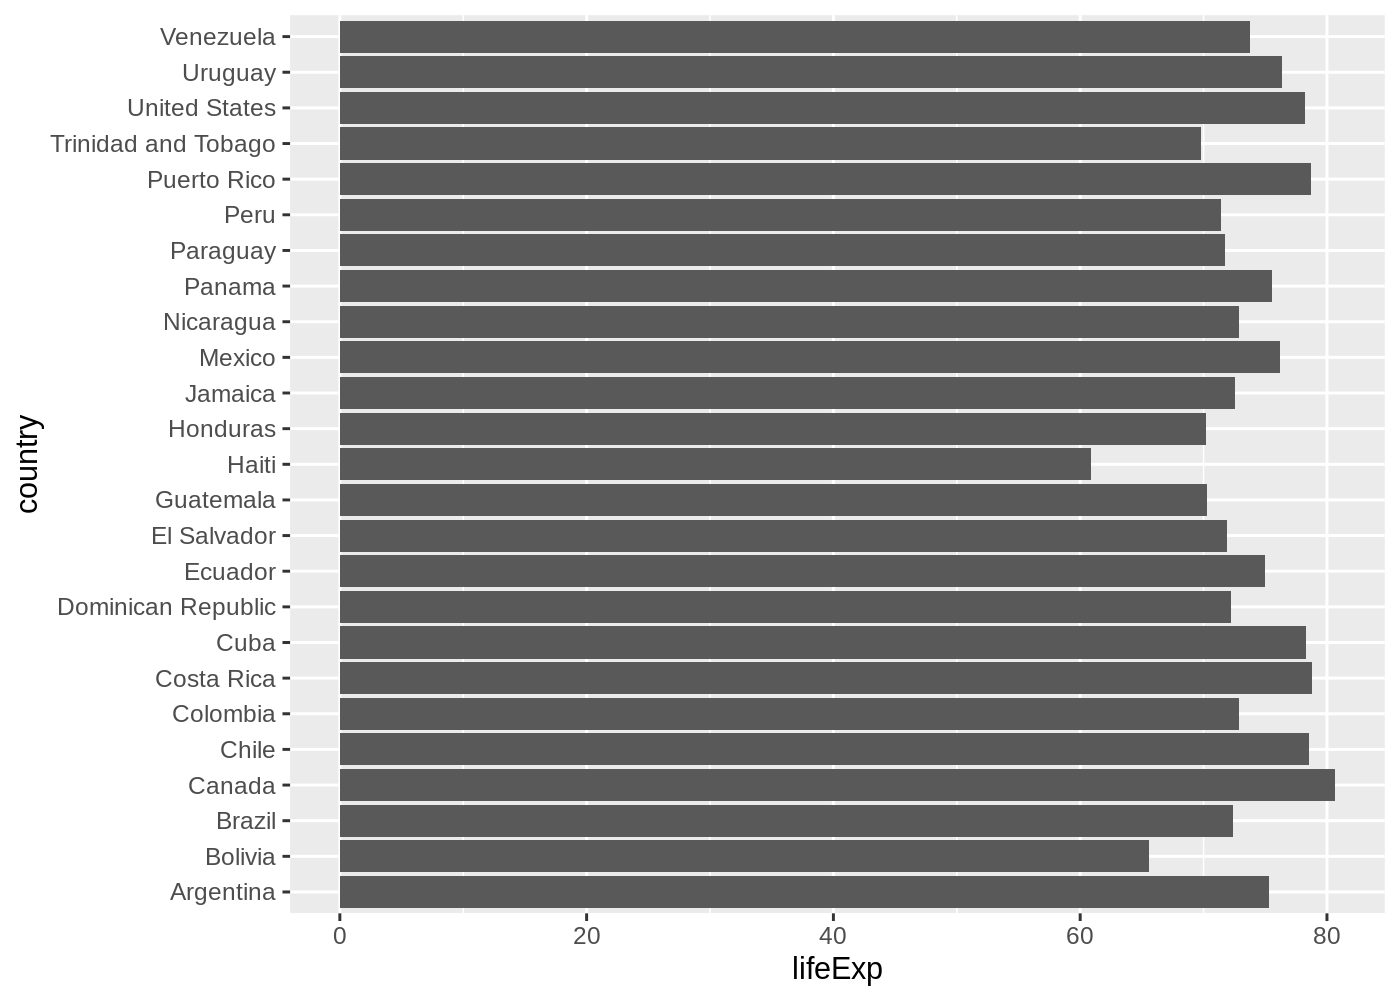

In [79]:
ggplot(
  data = gapminder %>% 
    filter(
      year == 2007, 
      continent == "Americas"),
  aes(
    x = lifeExp, 
    y = country)) + 
  geom_col()

## Line Chart

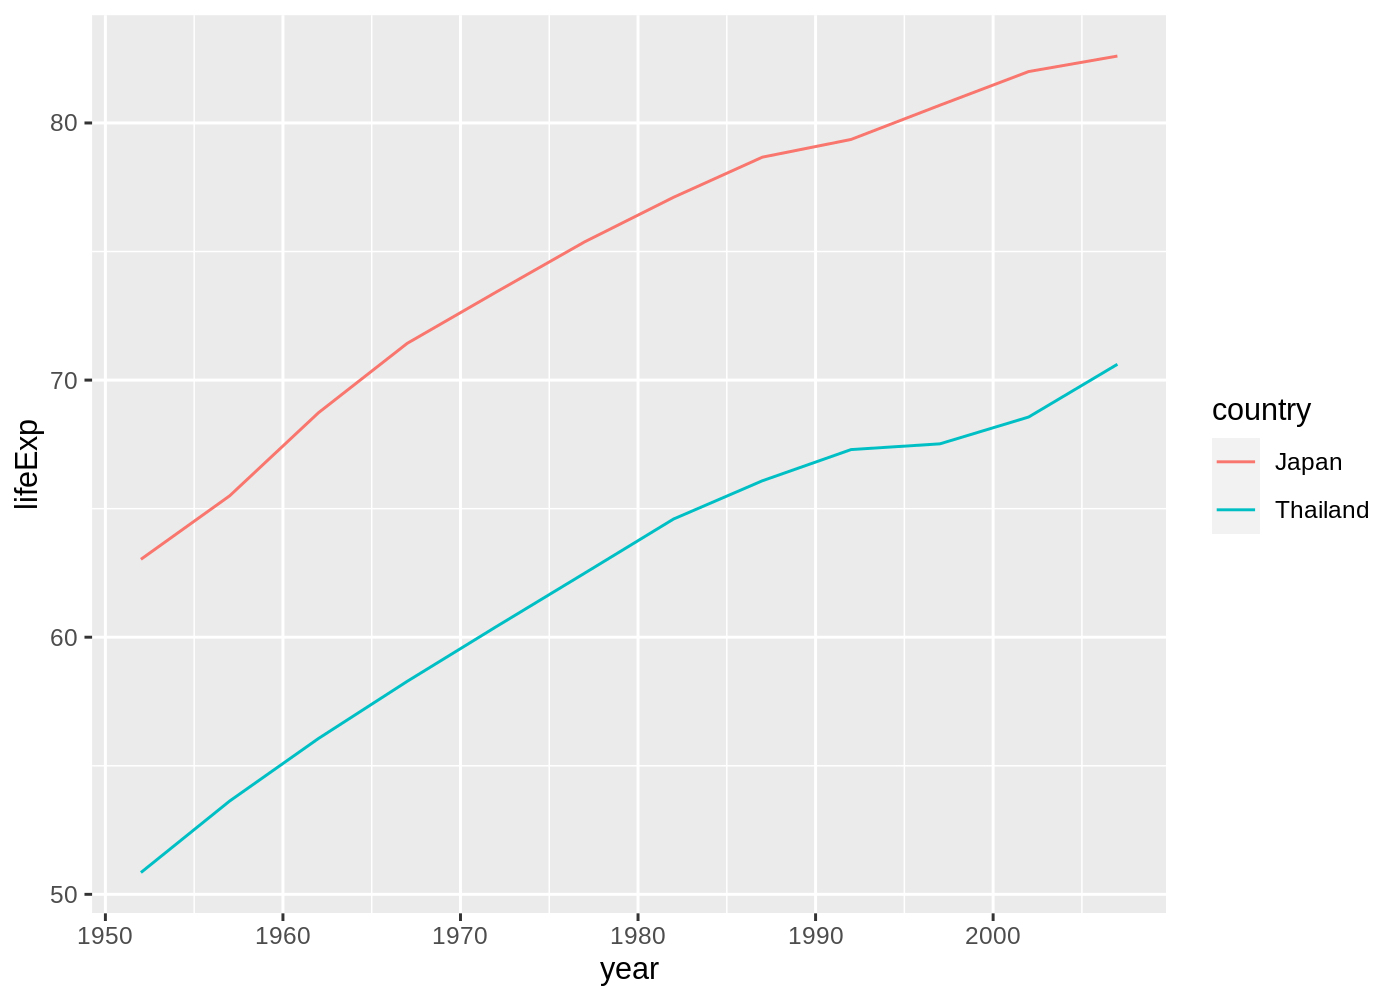

In [81]:
ggplot(
  data = gapminder %>% 
    filter(country %in% c("Thailand", "Japan")),
  aes(
    x = year, 
    y = lifeExp, 
    color = country)) + 
  geom_line()

## Histogram

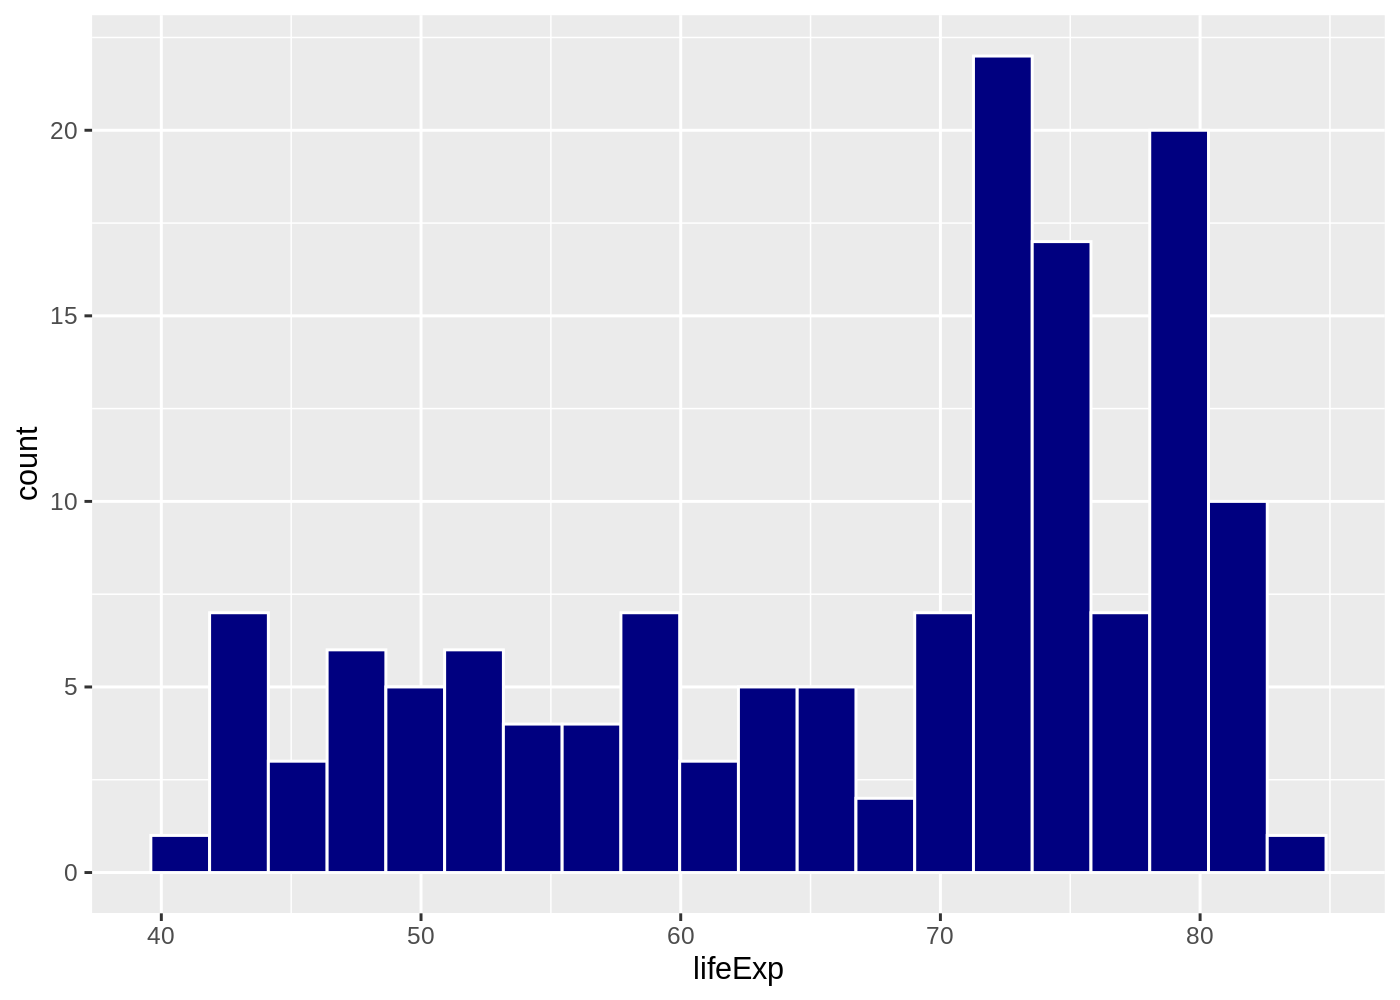

In [90]:
ggplot(
  data = gapminder %>% filter(year == 2007),
  aes(x = lifeExp)) + 
  geom_histogram(
    bins = 20, 
    fill = "navyblue", 
    color = "white")

## Treemap

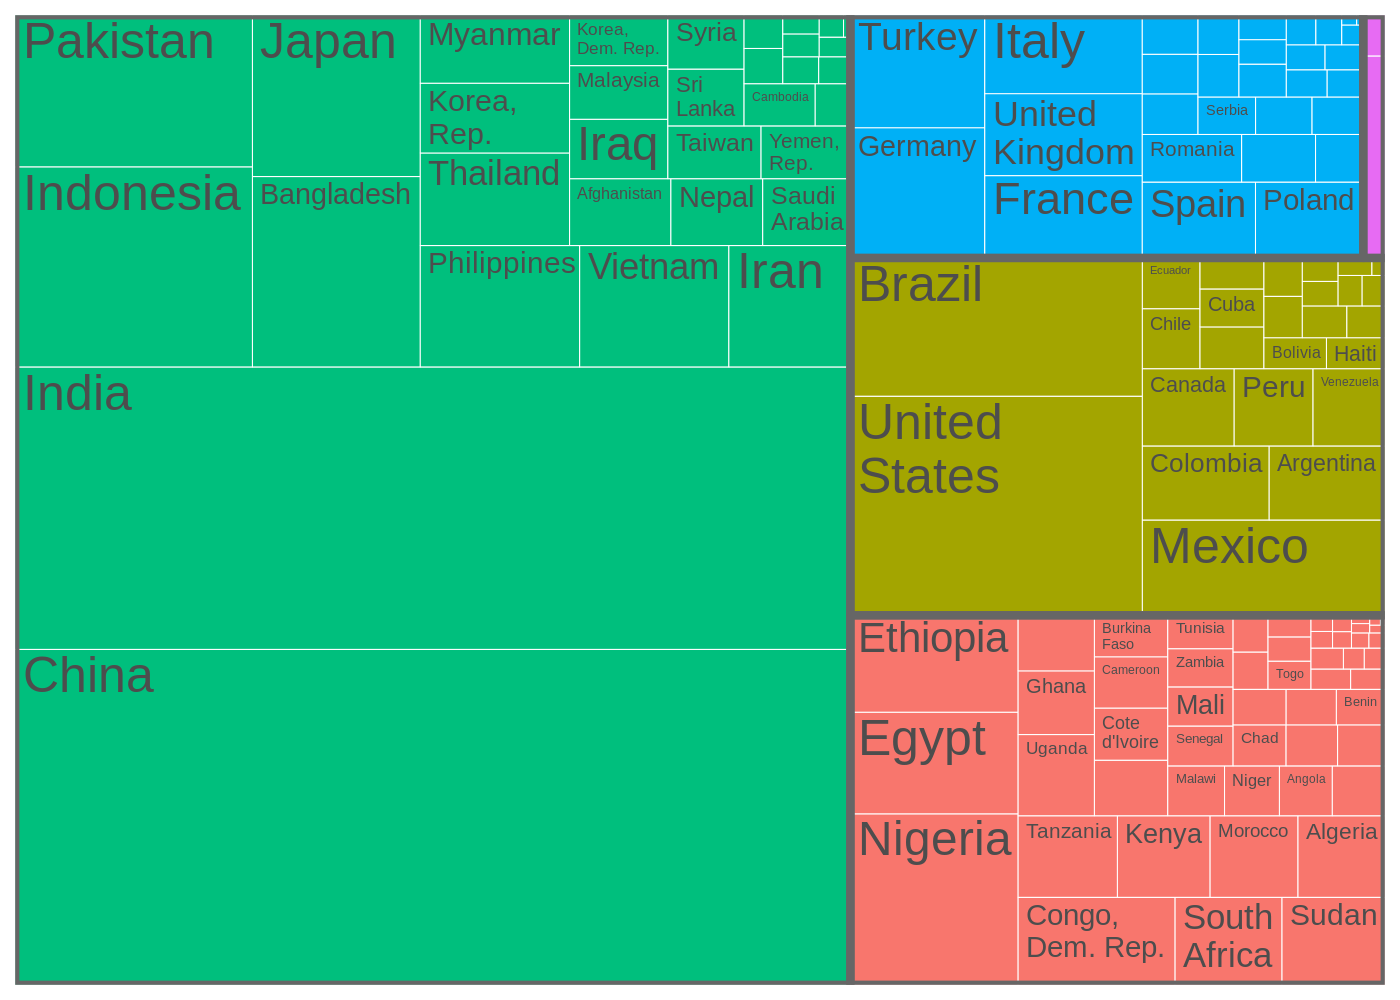

In [93]:
ggplot(gapminder %>% filter(year == "2007"), 
       aes(area = pop,
           fill = continent, 
           subgroup = continent,
           label = country
          )) +
  geom_treemap(color = "white") +
  geom_treemap_subgroup_border(color = "grey40") +
  geom_treemap_text(
    colour = "grey30", 
    place = "topleft", 
    reflow = T) +
  theme(legend.position = "none")

## Scatter Plot

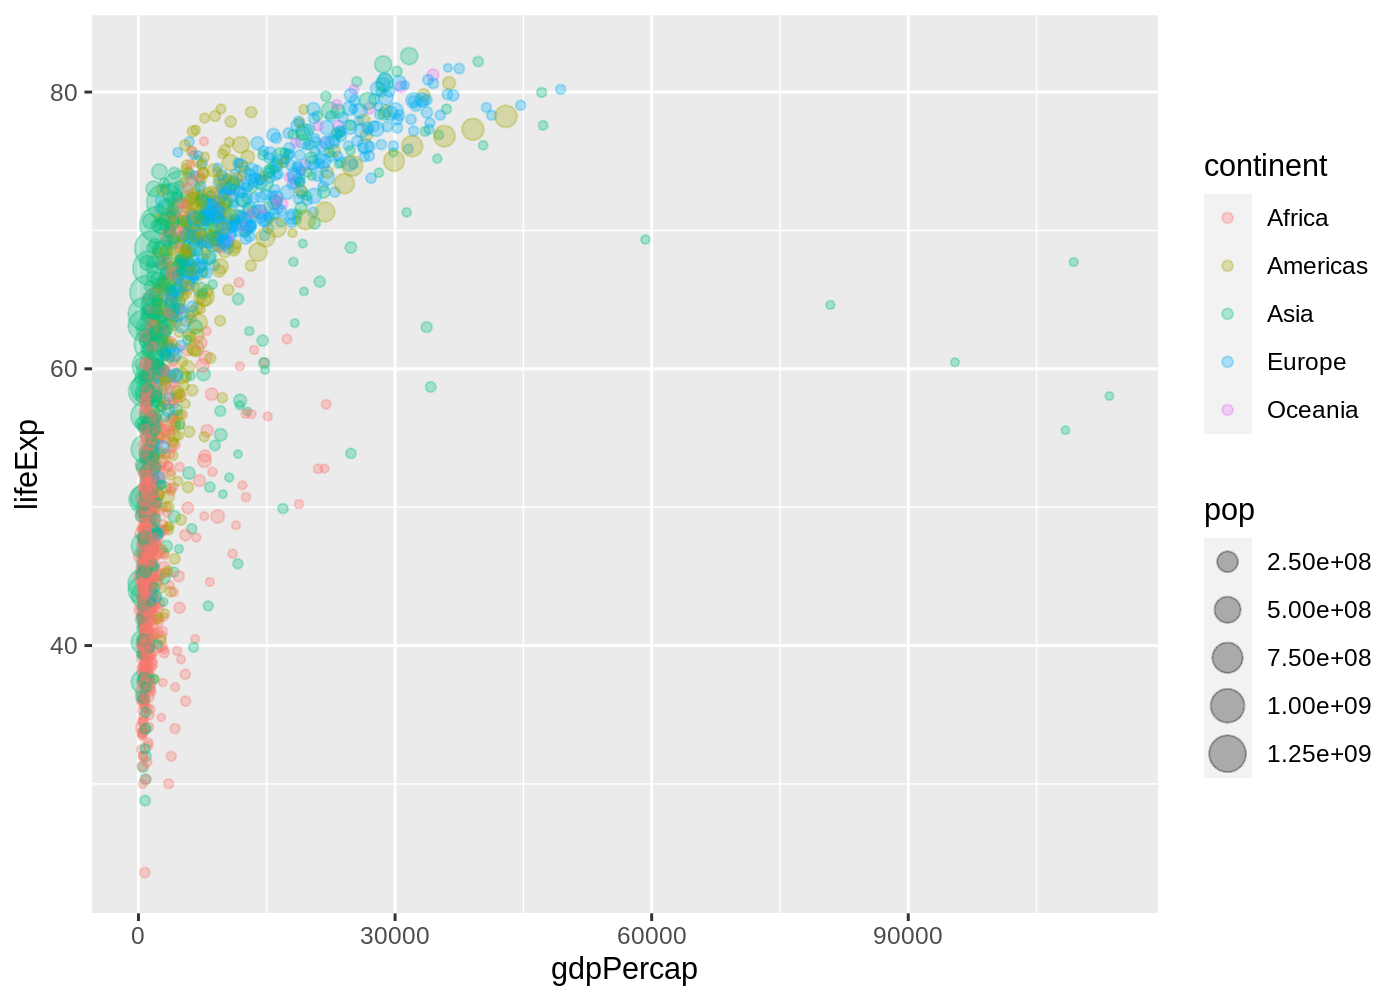

In [35]:
ggplot(data = gapminder, 
       aes(x = gdpPercap, 
           y = lifeExp, 
           size = pop, 
           col = continent)) + 
  geom_point(alpha = 0.3)

# Model

In [99]:
mod_1 <- lm(lifeExp ~ gdpPercap, data = gapminder)
summary(mod_1)


Call:
lm(formula = lifeExp ~ gdpPercap, data = gapminder)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.754  -7.758   2.176   8.225  18.426 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.396e+01  3.150e-01  171.29   <2e-16 ***
gdpPercap   7.649e-04  2.579e-05   29.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.49 on 1702 degrees of freedom
Multiple R-squared:  0.3407,	Adjusted R-squared:  0.3403 
F-statistic: 879.6 on 1 and 1702 DF,  p-value: < 2.2e-16


In [100]:
mod_2 <- lm(lifeExp ~ gdpPercap + I(gdpPercap^2), data = gapminder)
summary(mod_2)


Call:
lm(formula = lifeExp ~ gdpPercap + I(gdpPercap^2), data = gapminder)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.0600  -6.4253   0.2611   7.0889  27.1752 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.052e+01  2.978e-01  169.65   <2e-16 ***
gdpPercap       1.551e-03  3.737e-05   41.50   <2e-16 ***
I(gdpPercap^2) -1.502e-08  5.794e-10  -25.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.885 on 1701 degrees of freedom
Multiple R-squared:  0.5274,	Adjusted R-squared:  0.5268 
F-statistic: 949.1 on 2 and 1701 DF,  p-value: < 2.2e-16
